<a href="https://colab.research.google.com/github/ledyquesada/Ejercicios/blob/main/ISemana13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURONALES
**DEEP LEARNING**

In [3]:
#DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=input_size))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))


#RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=32, activation='relu', input_shape=(timesteps, input_features)))
model.add(Dense(units=num_classes, activation='softmax'))


#TRANSFER LEARNING

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)





**EJEMPLO CON DATOS ALEATORIOS**

In [4]:
#IMPORTAR
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Generar datos aleatorios para clasificación
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 muestras con 10 características cada una
y = np.random.randint(2, size=(1000, 1))  # Etiquetas binarias (0 o 1)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar las etiquetas utilizando One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Construir el modelo de red neuronal profunda (DNN)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=10))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax'))  # Dos clases para la clasificación binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
accuracy = model.evaluate(X_test, y_test_encoded)[1]
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 3s 32ms/step - loss: 0.6959 - accuracy: 0.5109 - val_loss: 0.6948 - val_accuracy: 0.5063
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.5406 - val_loss: 0.6938 - val_accuracy: 0.4875
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.5422 - val_loss: 0.6943 - val_accuracy: 0.4875
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.6861 - accuracy: 0.5562 - val_loss: 0.6937 - val_accuracy: 0.5125
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.5547 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6823 - accuracy: 0.5656 - val_loss: 0.6930 - val_accuracy: 0.4938
Epoch 7/10
20/20 [==============================] - 0s 14ms/step - loss: 0.6814 - accuracy: 0.5625 - val_loss: 0.6913 - val_accuracy: 0.5625
Epoch 8/10
20/20 

**MODELOS GENERATIVOS**

In [ ]:
#VAE

from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Definir arquitectura del VAE
input_dim = 784  # Ejemplo con datos MNIST
latent_dim = 2   # Dimensión de la distribución latente

# Codificación
inputs = Input(shape=(input_dim,))
h = Dense(128, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Función de muestreo
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decodificación
decoder_h = Dense(128, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# Construir el modelo VAE
vae = Model(inputs, x_decoded_mean)



#GAN

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input

# Definir arquitectura de la GAN
latent_dim = 100  # Dimensión del espacio latente

# Generador
generator = Sequential([
    Dense(128, input_dim=latent_dim),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28, 1))
])

# Discriminador
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])

# Construir la GAN conectando el generador y el discriminador
gan_input = Input(shape=(latent_dim,))
x = generator(gan_input)
gan_output = discriminator(x)

gan = Model(gan_input, gan_output)


**EJEMPLO PRACTICO I**

Se han truncado las últimas 5000 líneas del flujo de salida.
2/2 [==============================] - 0s 12ms/step
Epoch 6000/10000 [D loss: 7.1615584790706635 | D accuracy: 42.96875] [G loss: 1.4756818700334406e-06]
2/2 [==============================] - 0s 6ms/step
Epoch 7000/10000 [D loss: 7.583582282066345 | D accuracy: 46.09375] [G loss: 8.37402808429033e-07]
2/2 [==============================] - 0s 8ms/step
Epoch 8000/10000 [D loss: 7.808919206261635 | D accuracy: 46.875] [G loss: 4.178678523203416e-07]
2/2 [==============================] - 0s 5ms/step
Epoch 9000/10000 [D loss: 8.081504136323929 | D accuracy: 46.09375] [G loss: 2.7002764113603916e-07]
1/1 [==============================] - 0s 109ms/step


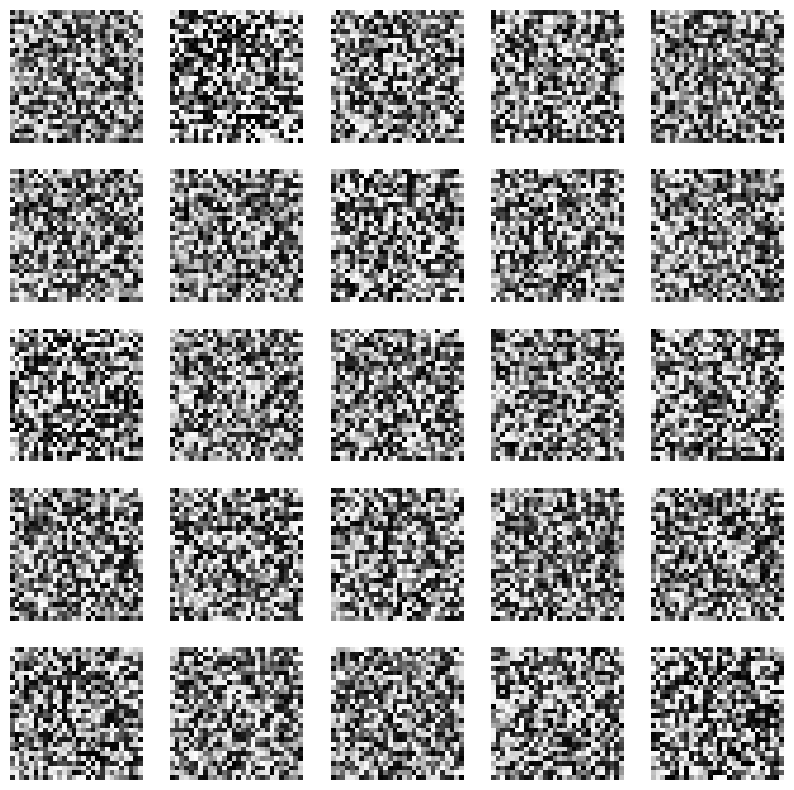

In [7]:
#IMPORTAMOS
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.datasets import mnist

# Cargar datos MNIST
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalizar imágenes al rango [-1, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Definir arquitectura de la GAN
latent_dim = 100

# Generador
generator = Sequential([
    Dense(128, input_dim=latent_dim),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dense(784, activation='tanh'),  # Tangente hiperbólica para escalar a [-1, 1]
    Reshape((28, 28, 1))
])

# Discriminador
discriminator = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])

# Construir la GAN conectando el generador y el discriminador
discriminator.trainable = False  # Congelar pesos del discriminador durante el entrenamiento del generador

gan_input = Input(shape=(latent_dim,))
x = generator(gan_input)
gan_output = discriminator(x)

gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Compilar el modelo discriminador
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la GAN
epochs = 10000
batch_size = 64

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    generated_images = generator.predict(noise)

    real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_images, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    labels_gan = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, labels_gan)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

# Generar imágenes con el generador entrenado
def generate_images(rows, columns):
    noise = np.random.normal(0, 1, size=(rows * columns, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Desnormalizar imágenes al rango [0, 1]

    fig, axs = plt.subplots(rows, columns, figsize=(10, 10))
    idx = 0
    for i in range(rows):
        for j in range(columns):
            axs[i, j].imshow(generated_images[idx, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            idx += 1
    plt.show()

# Visualizar imágenes generadas
generate_images(5, 5)
